In [103]:
import cv2
import random
import os
from imageio.v2 import imread
import numpy as np
from PIL import Image
from sklearn.preprocessing import MinMaxScaler
import shutil
from sklearn.model_selection import train_test_split
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

In [105]:
data_folders = ["Cyst", "Stone", "Tumor", "Normal"]
flat_data_arr = []
target_arr = []
base_dir = 'Dataset'

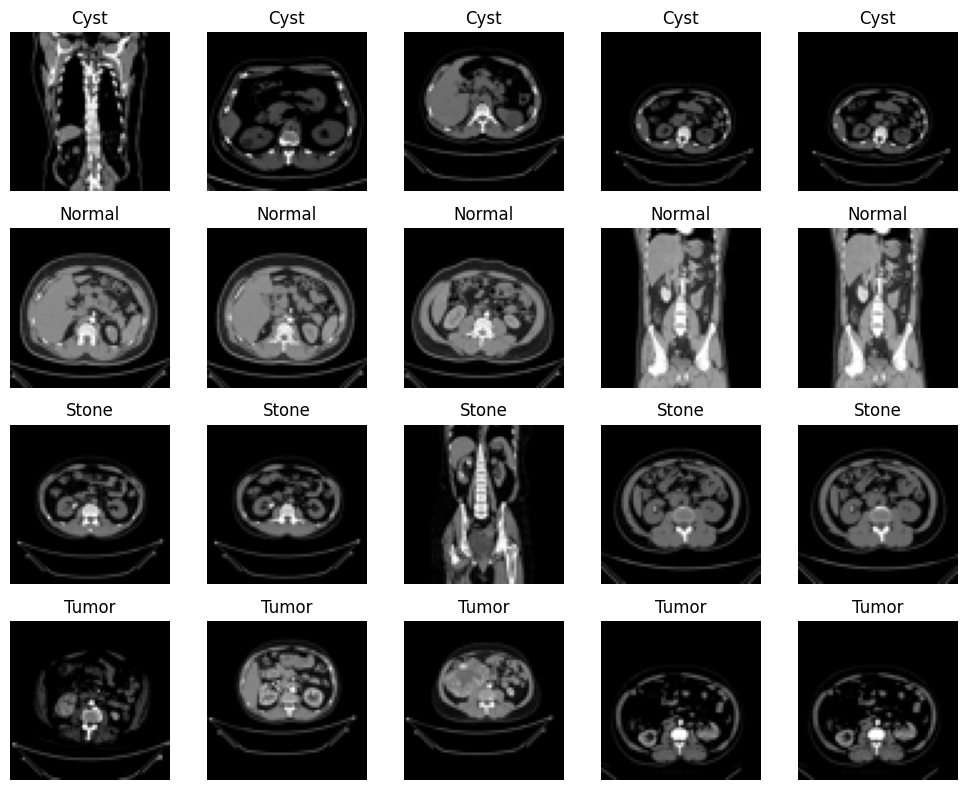

In [46]:
def load_and_display_images(dataset_path, image_size=(64, 64), images_per_class=5):
    # Get class labels from the directory names
    class_labels = os.listdir(dataset_path)
    
    # Set up the matplotlib figure
    fig, axes = plt.subplots(len(class_labels), images_per_class, figsize=(images_per_class * 2, len(class_labels) * 2))
    
    for label_idx, label in enumerate(class_labels):
        class_dir = os.path.join(dataset_path, label)
        
        if not os.path.isdir(class_dir):
            continue  # Skip any files, we are only interested in directories
        
        # List all image files in the class directory
        image_files = os.listdir(class_dir)[:images_per_class]
        
        for img_idx, filename in enumerate(image_files):
            img_path = os.path.join(class_dir, filename)
            
            try:
                # Open the image file
                img = Image.open(img_path)
                # Resize the image to the desired size
                img = img.resize(image_size)
                # Convert the image to a numpy array
                img_array = np.array(img)
                
                # Display the image and its label
                ax = axes[label_idx, img_idx]
                ax.imshow(img_array)
                ax.axis('off')
                ax.set_title(label, fontsize=12)  # Set title as class label
                
            except Exception as e:
                print(f"Error loading image {img_path}: {e}")
    
    plt.tight_layout()
    plt.show()


load_and_display_images(base_dir, image_size=(64, 64), images_per_class=5)


DATA SPLITTING

In [13]:
# Define the paths for your data
data_dir = 'Dataset'
train_dir = 'TRAIN'
test_dir = 'TEST'
val_dir = 'VAL'

# Define your categories or classes
categories = ["Cyst", "Stone", "Tumor", "Normal"]

# Create train, test, and validation directories if they don't exist
os.makedirs(train_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)
os.makedirs(val_dir, exist_ok=True)

# Split the data into train, test, and validation sets
for category in categories:
    category_dir = os.path.join(data_dir, category)
    files = os.listdir(category_dir)
    train_files, test_val_files = train_test_split(files, test_size=0.3, random_state=42)
    test_files, val_files = train_test_split(test_val_files, test_size=0.5, random_state=42)

    # Move files to appropriate directories
    for file in train_files:
        src = os.path.join(category_dir, file)
        dst = os.path.join(train_dir, category)
        os.makedirs(dst, exist_ok=True)
        shutil.copy(src, dst)

    for file in test_files:
        src = os.path.join(category_dir, file)
        dst = os.path.join(test_dir, category)
        os.makedirs(dst, exist_ok=True)
        shutil.copy(src, dst)

    for file in val_files:
        src = os.path.join(category_dir, file)
        dst = os.path.join(val_dir, category)
        os.makedirs(dst, exist_ok=True)
        shutil.copy(src, dst)


DISTRIBUTION OF IMAGES

TRAIN
TEST
VAL
Train set:
{'Cyst': 2596, 'Normal': 3553, 'Stone': 963, 'Tumor': 1598}

Test set:
{'Cyst': 556, 'Normal': 763, 'Stone': 207, 'Tumor': 342}

Validation set:
{'Cyst': 557, 'Normal': 762, 'Stone': 207, 'Tumor': 343}


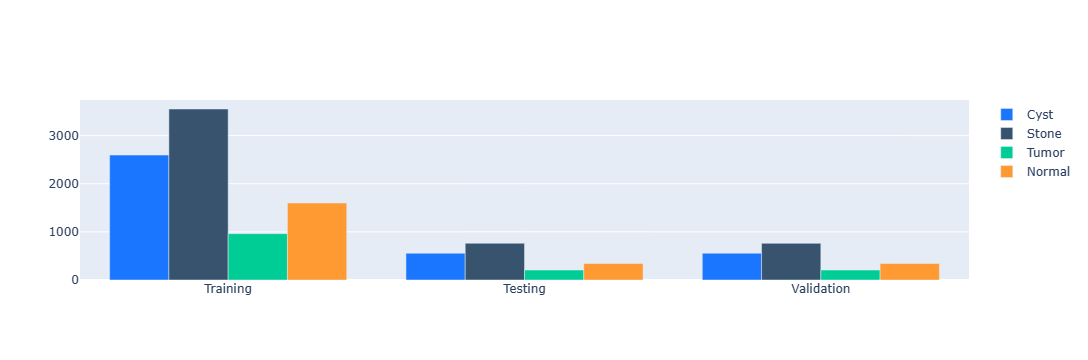

In [6]:
#To get count of data
def count_files(directory):
    print(directory)
    counts = {}
    for category in os.listdir(directory):
        category_dir = os.path.join(directory, category)
        counts[category] = len(os.listdir(category_dir))
    return counts

train_dir = 'TRAIN'
test_dir = 'TEST'
val_dir = 'VAL'

train_counts = count_files(train_dir)
test_counts = count_files(test_dir)
val_counts = count_files(val_dir)

print("Train set:")
print(train_counts)
print("\nTest set:")
print(test_counts)
print("\nValidation set:")
print(val_counts)

#Cyst Stone Tumor Normal
categories = ['Training', 'Testing', 'Validation']
train = list(train_counts.values())
test = list(test_counts.values())
val = list(val_counts.values())

cyst=[train[0],test[0],val[0]]
stone=[train[1],test[1],val[1]]
tumor=[train[2],test[2],val[2]]
normal=[train[3],test[3],val[3]]

trace1 = go.Bar(
   x = categories,
   y = cyst,
   name = 'Cyst',
   marker=dict(color='rgb(26, 118, 255)')
)
trace2 = go.Bar(
   x = categories,
   y = stone,
   name = 'Stone',
   marker=dict(color='rgb(55, 83, 109)')
)
trace3 = go.Bar(
   x = categories,
   y = tumor,
   name = 'Tumor',
   marker=dict(color='rgb(0, 204, 150)')
)
trace4 = go.Bar(
   x = categories,
   y = normal,
   name = 'Normal',
   marker=dict(color='rgb(255, 153, 50)')
)
data = [trace1, trace2, trace3,trace4]
layout = go.Layout(barmode = 'group')
fig = go.Figure(data = data, layout = layout)
go.Figure(fig).show()

In [ ]:
import os


def count_files(directory):
    counts = {}
    for category in os.listdir(directory):
        category_dir = os.path.join(directory, category)
        counts[category] = len(os.listdir(category_dir))
    return counts

train_counts = count_files(train_dir)
test_counts = count_files(test_dir)
val_counts = count_files(val_dir)

print("Train set:")
print(train_counts)
print("\nTest set:")
print(test_counts)
print("\nValidation set:")
print(val_counts)

#Cyst Stone Tumor Normal
categories = ['Training', 'Testing', 'Validation']
train = list(train_counts.values())
test = list(test_counts.values())
val = list(val_counts.values())

cyst=[train[0],test[0],val[0]]
stone=[train[1],test[1],val[1]]
tumor=[train[2],test[2],val[2]]
normal=[train[3],test[3],val[3]]

trace1 = go.Bar(
   x = categories,
   y = cyst,
   name = 'Cyst',
   marker=dict(color='rgb(26, 118, 255)')
)
trace2 = go.Bar(
   x = categories,
   y = stone,
   name = 'Stone',
   marker=dict(color='rgb(55, 83, 109)')
)
trace3 = go.Bar(
   x = categories,
   y = tumor,
   name = 'Tumor',
   marker=dict(color='rgb(0, 204, 150)')
)
trace4 = go.Bar(
   x = categories,
   y = normal,
   name = 'Normal',
   marker=dict(color='rgb(255, 153, 50)')
)
data = [trace1, trace2, trace3,trace4]
layout = go.Layout(barmode = 'group')
fig = go.Figure(data = data, layout = layout)
go.Figure(fig).show()

DATA PREPROCESSING CLAHE,GAUSSIAN_BLUR,CONTOUR DETECTION(cv2.findContour),WATERSHED_SEGMENTATION

In [15]:
def clahe(image_path):
    image = cv2.imread(image_path)
    # Convert the image to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # Apply CLAHE
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
    clahe_image = clahe.apply(gray_image)
    return clahe_image

def gaussian_blur(image):
    #image = cv2.imread(image_path)
    kernel_size = (5, 5)
    sigma = 0
    filtered_image = cv2.GaussianBlur(image, kernel_size, sigma)
    return filtered_image

def find_contour(image):
# Preprocessing
    blurred = cv2.GaussianBlur(image, (5, 5), 0)
    _, binary_image = cv2.threshold(blurred, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    # Contour detection
    contours, _ = cv2.findContours(binary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Filter contours based on area or other criteria if necessary
    # For example, you can iterate through contours and filter based on contour area:
    # filtered_contours = [cnt for cnt in contours if cv2.contourArea(cnt) > min_area]

    # Draw contours on original image
    contour_image = image.copy()
    cv2.drawContours(contour_image, contours, -1, (0, 255, 0), 2)
    contour_image = cv2.drawContours(cv2.cvtColor(image, cv2.COLOR_GRAY2BGR), contours, -1, (0, 255, 0), 2)
    return contour_image



def watershed_segmentation(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)  # Convert image to grayscale
    ret, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
    kernel = np.ones((3,3), np.uint8)
    opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=2)
    sure_bg = cv2.dilate(opening, kernel, iterations=3)
    dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)
    ret, sure_fg = cv2.threshold(dist_transform, 0.7*dist_transform.max(), 255, 0)
    sure_fg = np.uint8(sure_fg)
    unknown = cv2.subtract(sure_bg, sure_fg)

    # Marker labeling
    ret, markers = cv2.connectedComponents(sure_fg)

    # Add one to all labels so that sure background is not 0, but 1
    markers = markers + 1

    # Mark the unknown region with zero
    markers[unknown == 255] = 0

    # Apply watershed algorithm
    markers = cv2.watershed(image, markers)

    # Overlay segmentation result on original image
    image[markers == -1] = [255, 0, 0]  # Mark watershed boundaries

    return image



directories = ['TRAIN','TEST','VAL']  # List of base directories

for directory in directories:
    for folder in data_folders:
        folder_path = os.path.join(directory, folder)
        print("Folder Path:", folder_path)
        
        for filename in os.listdir(folder_path):
            if filename.endswith(".jpg"):
                image_path = os.path.join(folder_path, filename)
                
                # Preprocess image
                preprocessed_image = clahe(image_path)
                preprocessed_image = gaussian_blur(preprocessed_image)
                preprocessed_image = find_contour(preprocessed_image)
                preprocessed_image = watershed_segmentation(preprocessed_image)

                # Save preprocessed image in the same location
                output_path = os.path.join(folder_path, filename)
                cv2.imwrite(output_path, preprocessed_image)

print('Preprocess Completed')
print('Preprocess Completed')

Folder Path: TRAIN\Cyst
Folder Path: TRAIN\Stone
Folder Path: TRAIN\Tumor
Folder Path: TRAIN\Normal
Folder Path: TEST\Cyst
Folder Path: TEST\Stone
Folder Path: TEST\Tumor
Folder Path: TEST\Normal
Folder Path: VAL\Cyst
Folder Path: VAL\Stone
Folder Path: VAL\Tumor
Folder Path: VAL\Normal
Preprocess Completed
Preprocess Completed


Error loading image TEST\Normal\.ipynb_checkpoints: [Errno 13] Permission denied: 'D:\\RenalVision-KidneyDiseaseDetection\\RenalVision\\TEST\\Normal\\.ipynb_checkpoints'


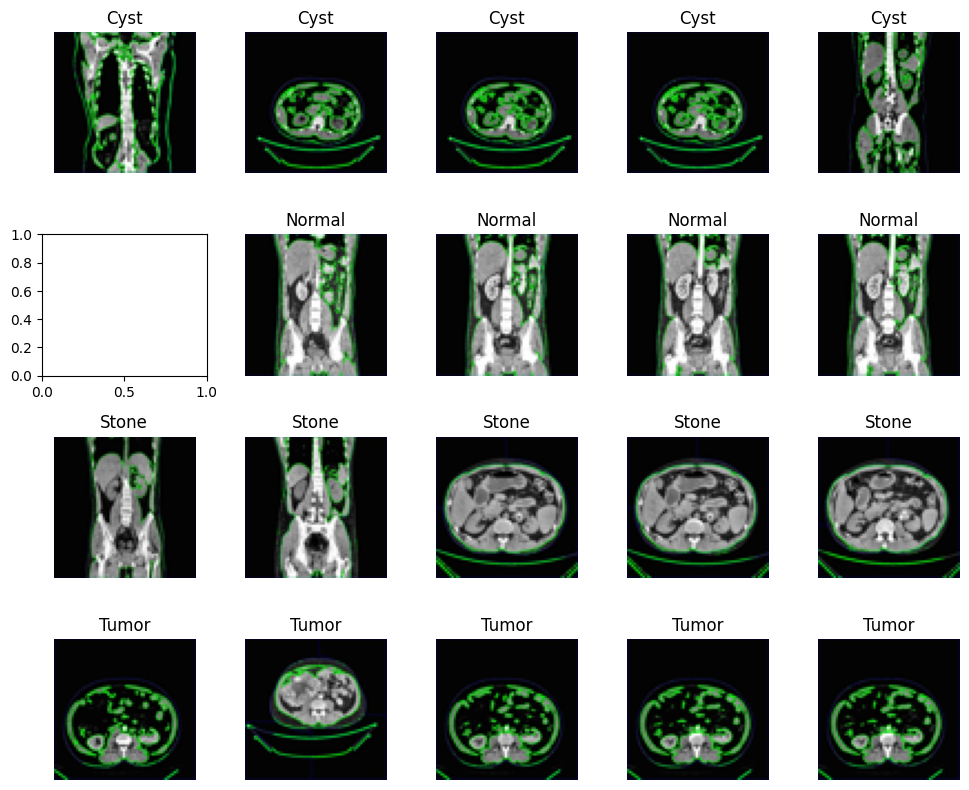

In [72]:
def load_and_display_images(dataset_path, image_size=(64, 64), images_per_class=5):
    # Get class labels from the directory names
    class_labels = os.listdir(dataset_path)
    
    # Set up the matplotlib figure
    fig, axes = plt.subplots(len(class_labels), images_per_class, figsize=(images_per_class * 2, len(class_labels) * 2))
    
    for label_idx, label in enumerate(class_labels):
        class_dir = os.path.join(dataset_path, label)
        
        if not os.path.isdir(class_dir):
            continue  # Skip any files, we are only interested in directories
        
        # List all image files in the class directory
        image_files = os.listdir(class_dir)[:images_per_class]
        
        for img_idx, filename in enumerate(image_files):
            img_path = os.path.join(class_dir, filename)
            
            try:
                # Open the image file
                img = Image.open(img_path)
                # Resize the image to the desired size
                img = img.resize(image_size)
                # Convert the image to a numpy array
                img_array = np.array(img)
                
                # Display the image and its label
                ax = axes[label_idx, img_idx]
                ax.imshow(img_array)
                ax.axis('off')
                ax.set_title(label, fontsize=12)  # Set title as class label
                
            except Exception as e:
                print(f"Error loading image {img_path}: {e}")
    
    plt.tight_layout()
    plt.show()

dir ='TEST'
load_and_display_images(dir, image_size=(64, 64), images_per_class=5)


Importing neccessary libraries for CNN-models

In [2]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16, DenseNet121, ResNet50, EfficientNetB3
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout, Flatten
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.utils import to_categorical

VGG16

In [25]:
# Directories of data
train_dir = 'TRAIN'
validation_dir = 'VAL'
test_dir = 'TEST'

In [26]:
# Define image data generators with data augmentation for training and validation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1./255)

# Define batch size
batch_size = 32

# Flow training images in batches from the train directory
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical'
)

# Flow validation images in batches from the validation directory
validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical'
)

# Flow testing images in batches from the test directory
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical'
)

Found 8710 images belonging to 4 classes.
Found 1869 images belonging to 4 classes.
Found 1867 images belonging to 4 classes.


In [57]:
# Define image data generators with data augmentation for training and validation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1./255)

# Define batch size
batch_size = 32

# Flow training images in batches from the train directory
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical'
)

# Flow validation images in batches from the validation directory
validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical'
)

# Flow testing images in batches from the test directory
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical'
)

Found 8710 images belonging to 4 classes.
Found 1869 images belonging to 4 classes.
Found 1867 images belonging to 4 classes.


In [45]:
# Load the pre-trained VGG16 model
Vgg16base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze all the layers in the base model
for layer in Vgg16base_model.layers:
    layer.trainable = False

x = Vgg16base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.4)(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.3)(x)
predictions = Dense(4, activation='softmax')(x)

vgg16model = Model(inputs=Vgg16base_model.input, outputs=predictions)

#vgg16model.summary()


In [52]:
# Compile the model
vgg16model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [47]:
# Callbacks for early stopping and saving the best model
callbacks = [
    EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
    ModelCheckpoint('vgg16.keras', monitor='val_loss', save_best_only=True)
]

In [48]:
# Train the model
history = vgg16model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=20,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size,
    callbacks=callbacks
)

Epoch 1/20
272/272 ━━━━━━━━━━━━━━━━━━━━ 1266s 5s/step - accuracy: 0.4652 - loss: 1.2276 - val_accuracy: 0.6875 - val_loss: 0.8167
Epoch 2/20
  1/272 ━━━━━━━━━━━━━━━━━━━━ 20:54 5s/step - accuracy: 0.5625 - loss: 0.9155

C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.12_3.12.1008.0_x64__qbz5n2kfra8p0\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


272/272 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.5625 - loss: 0.9155 - val_accuracy: 0.6154 - val_loss: 0.8707
Epoch 3/20
272/272 ━━━━━━━━━━━━━━━━━━━━ 1279s 5s/step - accuracy: 0.6768 - loss: 0.8263 - val_accuracy: 0.7872 - val_loss: 0.5615
Epoch 4/20
272/272 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.8125 - loss: 0.4752 - val_accuracy: 0.9231 - val_loss: 0.4221
Epoch 5/20
272/272 ━━━━━━━━━━━━━━━━━━━━ 1250s 5s/step - accuracy: 0.7436 - loss: 0.6747 - val_accuracy: 0.7990 - val_loss: 0.5203
Epoch 6/20
272/272 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7188 - loss: 0.5163 - val_accuracy: 0.9231 - val_loss: 0.4139
Epoch 7/20
272/272 ━━━━━━━━━━━━━━━━━━━━ 1266s 5s/step - accuracy: 0.7694 - loss: 0.6099 - val_accuracy: 0.8341 - val_loss: 0.4533
Epoch 8/20
272/272 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.6562 - loss: 0.8905 - val_accuracy: 1.0000 - val_loss: 0.1883
Epoch 9/20
272/272 ━━━━━━━━━━━━━━━━━━━━ 1318s 5s/step - accuracy: 0.7817 - loss: 0.5904 - val_accuracy: 0.843

In [57]:
BATCH_SIZE=32
# Evaluate the model on test set
vgg16test_loss, vgg16test_acc = vgg16model.evaluate(test_generator, steps=test_generator.samples // BATCH_SIZE)
print('Test accuracy:', vgg16test_acc)


58/58 ━━━━━━━━━━━━━━━━━━━━ 238s 4s/step - accuracy: 0.8196 - loss: 0.4837
Test accuracy: 0.8232758641242981


In [56]:
# Evaluate the model on validation set
vgg16val_loss, vgg16val_acc = vgg16model.evaluate(validation_generator, steps=validation_generator.samples // BATCH_SIZE)
print('Validation accuracy:', vgg16val_acc)

58/58 ━━━━━━━━━━━━━━━━━━━━ 245s 4s/step - accuracy: 0.8487 - loss: 0.4536
Validation accuracy: 0.8351293206214905


DenseNet121

In [62]:
# Load the pre-trained DenseNet121 model (excluding top layers)
DenseNet_base_model = DenseNet121(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the base model layers
for layer in DenseNet_base_model.layers:
    layer.trainable = False

# Add custom classification layers
x = GlobalAveragePooling2D()(DenseNet_base_model.output)
x = Dense(256, activation='relu')(x)
x = Dropout(0.4)(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.3)(x)
output = Dense(4, activation='softmax')(x)  # 4 classes: Cyst, Normal, Stone, Tumor

# Create the final model
densenet_model = Model(inputs=DenseNet_base_model.input, outputs=output)

# Compile the model
densenet_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
densenet_model.summary()

In [64]:
# Callbacks for saving the best model and early stopping
checkpoint = ModelCheckpoint('denseNet121.keras', monitor='val_accuracy', save_best_only=True, mode='max')
early_stopping = EarlyStopping(monitor='val_loss', patience=5, mode='min')

In [65]:
# Train the model
history = densenet_model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=20,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size,
    callbacks=callbacks
)

Epoch 1/20
272/272 ━━━━━━━━━━━━━━━━━━━━ 1383s 5s/step - accuracy: 0.5326 - loss: 1.1420 - val_accuracy: 0.7091 - val_loss: 0.7099
Epoch 2/20
272/272 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.8438 - loss: 0.5303 - val_accuracy: 0.8462 - val_loss: 0.5859
Epoch 3/20
272/272 ━━━━━━━━━━━━━━━━━━━━ 1268s 5s/step - accuracy: 0.7137 - loss: 0.7337 - val_accuracy: 0.7963 - val_loss: 0.5286
Epoch 4/20
272/272 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.8125 - loss: 0.5497 - val_accuracy: 0.8462 - val_loss: 0.6445
Epoch 5/20
272/272 ━━━━━━━━━━━━━━━━━━━━ 1531s 6s/step - accuracy: 0.7646 - loss: 0.6273 - val_accuracy: 0.7974 - val_loss: 0.5350


In [96]:
densenet_model.save('DenseNet121.keras')

In [66]:
# Validate the model
val_loss_densenet, val_accuracy_densenet = densenet_model.evaluate(validation_generator, steps=len(validation_generator))
print(f'Validation Loss: {val_loss_densenet:.4f}')
print(f'Validation Accuracy: {val_accuracy_densenet:.4f}')

59/59 ━━━━━━━━━━━━━━━━━━━━ 223s 4s/step - accuracy: 0.7163 - loss: 0.6991
Validation Loss: 0.7091
Validation Accuracy: 0.7100


In [67]:
test_loss, test_accuracy = densenet_model.evaluate(test_generator)
print(f"Test Accuracy: {test_accuracy:.2f}")

59/59 ━━━━━━━━━━━━━━━━━━━━ 242s 4s/step - accuracy: 0.7568 - loss: 0.6480
Test Accuracy: 0.72


ResNet50

In [77]:
# Load the ResNet50 model without the top layer
ResNetbase_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the layers of the base model
for layer in ResNetbase_model.layers:
    layer.trainable = False

# Build the new top layers
x = ResNetbase_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.4)(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.3)(x)
output = Dense(4, activation='softmax')(x)  # 4 classes: Cyst, Normal, Stone, Tumor

# Create the final model
resnet_model = Model(inputs=ResNetbase_model.input, outputs=output)

# Compile the model
resnet_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
resnet_model.summary()

In [78]:
# Callbacks for saving the best model and early stopping
checkpoint = ModelCheckpoint('resnet50.keras', monitor='val_accuracy', save_best_only=True, mode='max')
early_stopping = EarlyStopping(monitor='val_loss', patience=5, mode='min')

In [79]:
# Train the model
history = resnet_model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=20,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size,
    callbacks=callbacks
)

Epoch 1/20
272/272 ━━━━━━━━━━━━━━━━━━━━ 1272s 5s/step - accuracy: 0.3757 - loss: 1.3492 - val_accuracy: 0.4084 - val_loss: 1.2740
Epoch 2/20
272/272 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.4688 - loss: 1.2774 - val_accuracy: 0.3077 - val_loss: 1.3117
Epoch 3/20
272/272 ━━━━━━━━━━━━━━━━━━━━ 947s 3s/step - accuracy: 0.4114 - loss: 1.2945 - val_accuracy: 0.4364 - val_loss: 1.2663
Epoch 4/20
272/272 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.4062 - loss: 1.2370 - val_accuracy: 0.5385 - val_loss: 1.2230
Epoch 5/20
272/272 ━━━━━━━━━━━━━━━━━━━━ 2077s 8s/step - accuracy: 0.4250 - loss: 1.2737 - val_accuracy: 0.5113 - val_loss: 1.2538


In [94]:
resnet_model.save('resnetmodel.keras')

In [80]:
# Validate the model
val_loss_resnet, val_accuracy_resnet = resnet_model.evaluate(validation_generator, steps=len(validation_generator))
print(f'Validation Loss: {val_loss_resnet:.4f}')
print(f'Validation Accuracy: {val_accuracy_resnet:.4f}')

59/59 ━━━━━━━━━━━━━━━━━━━━ 187s 3s/step - accuracy: 0.4236 - loss: 1.2691
Validation Loss: 1.2743
Validation Accuracy: 0.4077


In [81]:
# Evaluate the model
test_loss, test_accuracy = resnet_model.evaluate(test_generator)
print(f"Test Accuracy: {test_accuracy:.2f}")

59/59 ━━━━━━━━━━━━━━━━━━━━ 206s 3s/step - accuracy: 0.3907 - loss: 1.2855
Test Accuracy: 0.41


EfficientNetB3

In [88]:
# Load the pre-trained EfficientNetB3 model (excluding top layers)
effnetb3_base_model = EfficientNetB3(weights='imagenet', include_top=False, input_shape=(224,224, 3))

# Freeze the base model layers
for layer in effnetb3_base_model.layers:
    layer.trainable = False

# Add custom classification layers
x = GlobalAveragePooling2D()(effnetb3_base_model.output)
x = Dense(256, activation='relu')(x)
x = Dropout(0.4)(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.3)(x)
output = Dense(4, activation='softmax')(x)  # 4 classes: Cyst, Normal, Stone, Tumor

# Create the final model
effnet_model = Model(inputs=effnetb3_base_model.input, outputs=output)

# Compile the model
effnet_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])



In [89]:
# Callbacks for early stopping and saving the best model
callbacks = [
    EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
    ModelCheckpoint('efficientnetb3.keras', monitor='val_loss', save_best_only=True)
]

In [90]:
# Train the model
history = effnet_model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=20,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size,
    callbacks=callbacks
)

Epoch 1/20
272/272 ━━━━━━━━━━━━━━━━━━━━ 1499s 5s/step - accuracy: 0.3798 - loss: 1.3301 - val_accuracy: 0.4084 - val_loss: 1.2843
Epoch 2/20
272/272 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.2812 - loss: 1.3263 - val_accuracy: 0.3077 - val_loss: 1.2967
Epoch 3/20
272/272 ━━━━━━━━━━━━━━━━━━━━ 1300s 5s/step - accuracy: 0.4089 - loss: 1.3023 - val_accuracy: 0.4073 - val_loss: 1.2830
Epoch 4/20
272/272 ━━━━━━━━━━━━━━━━━━━━ 9s 16ms/step - accuracy: 0.3438 - loss: 1.3495 - val_accuracy: 0.4615 - val_loss: 1.2544
Epoch 5/20
272/272 ━━━━━━━━━━━━━━━━━━━━ 1282s 5s/step - accuracy: 0.4146 - loss: 1.2817 - val_accuracy: 0.4084 - val_loss: 1.2822
Epoch 6/20
272/272 ━━━━━━━━━━━━━━━━━━━━ 11s 26ms/step - accuracy: 0.3438 - loss: 1.3180 - val_accuracy: 0.3077 - val_loss: 1.2233
Epoch 7/20
272/272 ━━━━━━━━━━━━━━━━━━━━ 1428s 5s/step - accuracy: 0.4149 - loss: 1.2797 - val_accuracy: 0.4079 - val_loss: 1.2816
Epoch 8/20
272/272 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.4688 - loss: 1.2212 - val_a

In [91]:
# Validate the model
val_loss_effnet, val_accuracy_effnet = effnet_model.evaluate(validation_generator, steps=len(validation_generator))
print(f'Validation Loss: {val_loss_effnet:.4f}')
print(f'Validation Accuracy: {val_accuracy_effnet:.4f}')

59/59 ━━━━━━━━━━━━━━━━━━━━ 244s 4s/step - accuracy: 0.4030 - loss: 1.2842
Validation Loss: 1.2817
Validation Accuracy: 0.4077


In [92]:
# Evaluate the model
test_loss, test_accuracy = effnet_model.evaluate(test_generator)
print(f"Test Accuracy: {test_accuracy:.2f}")

59/59 ━━━━━━━━━━━━━━━━━━━━ 261s 4s/step - accuracy: 0.4136 - loss: 1.2832
Test Accuracy: 0.41


In [95]:
effnet_model.save('EfficientB3.keras')

Accuracy

In [98]:
data = {
    'VGG16': vgg16val_acc,
    'DenseNet121': val_accuracy_densenet,
    'EfficientNetB3': val_accuracy_effnet,
    'ResNet50' : val_accuracy_resnet
}

In [100]:
df = pd.DataFrame.from_dict(data, orient='index', columns=['accuracy'])
df = df.reset_index().rename(columns={'index': 'model'})

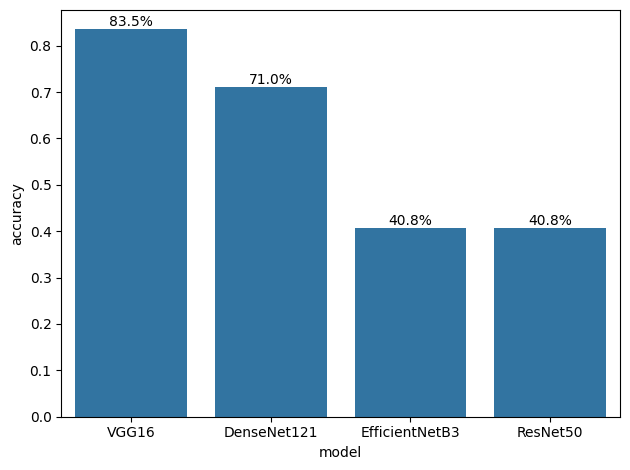

In [102]:
# Create bar chart
sns.barplot(x='model', y='accuracy', data=df)

# Add labels to bars
ax = plt.gca()
for bar in ax.containers:
    ax.bar_label(bar, label_type='edge', labels=[f"{x:.1%}" for x in bar.datavalues], fontsize=10)

# Adjust the layout
plt.tight_layout()

plt.show()

In [105]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import itertools

# Generate predictions
predictions = model.predict(test_generator)

# Convert predictions to class labels
predicted_classes = np.argmax(predictions, axis=1)

# Get true labels
true_classes = test_generator.classes

# Get class labels
class_labels = list(test_generator.class_indices.keys())

# Generate confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)

# Function to plot confusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure(figsize=(10, 8))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Plot non-normalized confusion matrix
plot_confusion_matrix(cm, classes=class_labels, title='Confusion Matrix')

plt.show()


INFO:tensorflow:Error reported to Coordinator: 'Exception encountered when calling Functional.call().\n\n\x1b2680798642144\x1b\n\nArguments received by Functional.call():\n  • inputs=tf.Tensor(shape=(32, 224, 224, 3), dtype=float32)\n  • training=False\n  • mask=None'
Traceback (most recent call last):
  File "C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\tensorflow\python\training\coordinator.py", line 293, in stop_on_exception
    yield
  File "C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\tensorflow\python\distribute\mirrored_run.py", line 387, in run
    self.main_result = self.main_fn(*self.main_args, **self.main_kwargs)
                       ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\lo

INFO:tensorflow:Error reported to Coordinator: 'Exception encountered when calling Functional.call().\n\n\x1b2680798642144\x1b\n\nArguments received by Functional.call():\n  • inputs=tf.Tensor(shape=(32, 224, 224, 3), dtype=float32)\n  • training=False\n  • mask=None'
Traceback (most recent call last):
  File "C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\tensorflow\python\training\coordinator.py", line 293, in stop_on_exception
    yield
  File "C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\tensorflow\python\distribute\mirrored_run.py", line 387, in run
    self.main_result = self.main_fn(*self.main_args, **self.main_kwargs)
                       ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\lo

KeyError: 'Exception encountered when calling Functional.call().\n\n\x1b[1m2680798642144\x1b[0m\n\nArguments received by Functional.call():\n  • inputs=tf.Tensor(shape=(32, 224, 224, 3), dtype=float32)\n  • training=False\n  • mask=None'